# fastai approach

In [1]:
from fastcore.all import *
from fastai.vision.all import *
import pathlib

c:\Users\Wiktor\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
! wandb login

wandb: Currently logged in as: gratkadlafana. Use `wandb login --relogin` to force relogin


In [3]:
import wandb
wandb.init(project="phcd_numbers")

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: gratkadlafana. Use `wandb login --relogin` to force relogin


Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


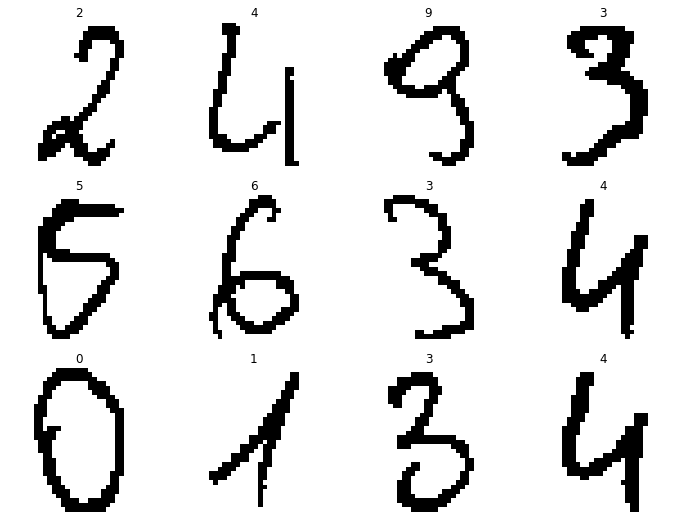

In [2]:
data_path = pathlib.Path("../data/numbers/train")

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
).dataloaders(data_path, bs=32)

dls.show_batch(max_n=12)

In [3]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

c:\Users\Wiktor\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\Wiktor\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.756768,0.514462,0.160718,01:16


epoch,train_loss,valid_loss,error_rate,time
0,0.129210,0.054392,0.017136,01:13
1,0.059474,0.028156,0.008112,01:13
2,0.026970,0.026473,0.008213,01:13


In [6]:
learn.export('../models/resnet18-finetuned.pkl')

Predicted label: 7, Actual label: 7
Probability: 0.9996


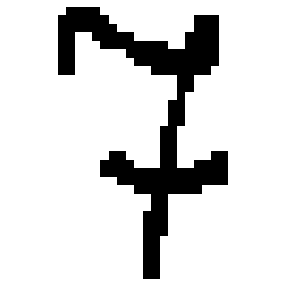

In [6]:
import numpy as np

data_path = pathlib.Path("../data/numbers/train")

i = np.random.randint(0, 10)
path = np.random.choice(list((data_path / str(i)).glob("*.png")))
prediction,_,probs = learn.predict(PILImage.create(path))
print(f"Predicted label: {prediction}, Actual label: {i}")
print(f"Probability: {probs[i]:.4f}")

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

im = Image.open(path)
ax.imshow(im, cmap="gray")
ax.axis("off")

plt.show()

In [4]:
test_data_path = pathlib.Path("../data/numbers/test")
test_dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    #splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
).dataloaders(data_path, bs=32)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [8]:
learn2 = load_learner('../models/resnet18-finetuned.pkl') 
learn2.dls = test_dls

In [14]:
preds, y, loss = learn.get_preds(with_loss=True)
# get accuracy
acc = accuracy(preds, y)
print(f"Accuracy: {float(acc)*100:.5f}%")

Accuracy: 99.17867%


#